# Logistic and Softmax Regression

## 1. How it works
Standard linear model:

$y_i=\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_kx_{ik}+e_i,  \;\;\;\; e_i \sim N(0, \sigma^2)$

The mean of expected value of the response is:

$\mathbb{E}(y_i)=\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_kx_{ik}=\eta_i$

In a GLM, there is a link function g between $\eta$ and the mean of the response variable: $g(\mathbb{E}(y_i))=\eta_i$. The corresponding link function is called the logit function

* __Logit function__

$\eta=g(p)=log(\frac{p}{1-p})$

It is the log of the odds. Regression under this model is called logistic regression. It we write out the fitted model for the log odds, it would be like:
$log\frac{\mathbb{P}(y=1)}{\mathbb{P}(y=0)}=\beta_0+\beta_1X_1+...\beta_nX_n$

* __Sigmoid function__

$p=\mathbb{E}y=\mathbb{P}{(y=1)}=\frac{e^\eta}{1+e^\eta}=\frac{1}{1+e^{-\eta}}$

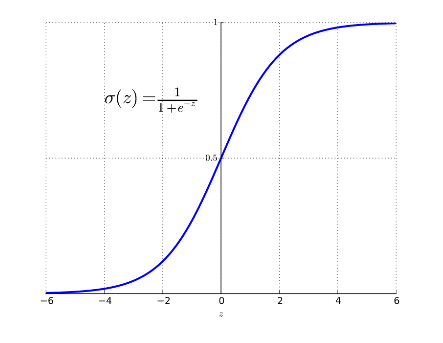

In [1]:
from IPython.display import Image
Image(filename='sigmoid.png')

* __Prediction__

$\hat{y}=\left\{
                \begin{array}{ll}
                 0      & \text{if } \hat{p}<0.5,\\
                 1      & \text{if } \hat{p}\geq0.5.
                \end{array}
              \right.
$

* __Cost Function of a single training instance__

$c(\theta)=\left\{
                \begin{array}{ll}
                  -log(\hat{p})       & \text{if } y=1\\
                  -log(1-\hat{p})     & \text{if } y=0
                \end{array}
              \right.
$

* __Log Loss (over the whole training set)__

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$

## 2. Assumption
* Target variable is binary
* Features are independent of one another. That is, the model should have little or no multicollinearity.
* Sample size is adequate (It uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, and thus relies on large-sample approximations.)
* The independent variables are linearly related to the log odds.
* Errors need to be independent but NOT normally distributed.

## 3. Maximum Likelihood Estimation (MLE)
* MLE is an iterative algorithm which starts with initial arbitrary numbers of what the coefficients should be. We will use the MLE to learn the parameters.
* After this initial function is estimated, the process is repeated until LL (Log Likelihood) does not change significantly. 

## 4. Prepare Data for Logistic Regression
* Binary Output Variable
* Remove Noise
* Gaussian Distribution
* Remove Correlated Inputs
* Fail to Converge: This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

## 5. Performance Measures
* __Accuracy__

$accuracy=\frac{TP+TN}{TP+FP+TN+FN}$

* __Precision__

$precision=\frac{TP}{TP+FP}$

* __Recall__/__Sensitivity__

$recall=\frac{TP}{TP+FN}=TPR(True\;Positive\;Rate)$

* __$F_1$ score__

The F1 score is the harmonic mean of precision and recall.

$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2\times\frac{precision\times recall}{precision+recall}$

* __The ROC Curve__

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive.


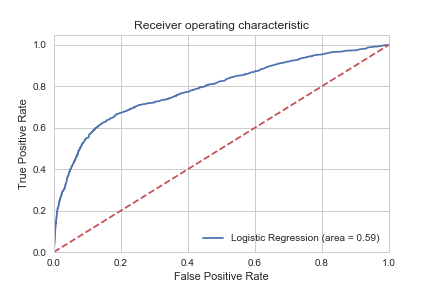

In [1]:
from IPython.display import Image
Image(filename='Log_ROC.png')

Once again there is a tradeoff: the higher the recall (TPR), the more false positives(FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

The ROC curve is more informative than the classification table since it summarizes the predictive power for all possible threshold $\pi_0$.

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.

* __ROC AUC score__

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

## 6.Pros and Cons
__Pros__

* low variance
* provides probabilities for outcomes
* works well with diagonal (feature) decision boundaries
* NOTE: logistic regression can also be used with kernel methods

__Cons__
* high bias

## 7. Logistic Regression in Python

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


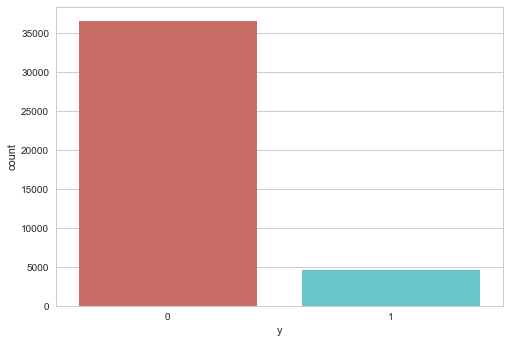

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 40  1 13 17 16  1 27 11  1 24 39 42  1 31  1  1 19 21 41  2  3  4
 43  6  7 38  8 10 15  1 14 44 36 29 37 20 30 28 23  1  1  1 18 22 25  1  1
  1 32  5  9  1 34 26  1  1  1  1]
Optimization terminated successfully.
         Current function value: 0.282830
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                M

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:1650: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 62 but corresponding boolean dimension is 61
  result = getitem(key)


10-fold cross validation average accuracy: 0.898
[[10883    98]
 [ 1116   260]]
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.73      0.19      0.30      1376

avg / total       0.89      0.90      0.88     12357



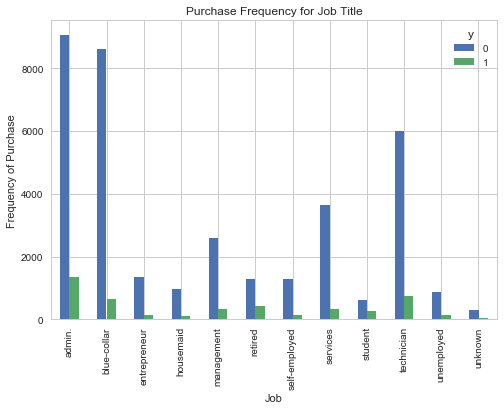

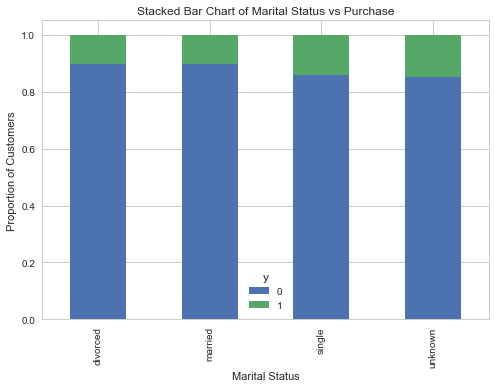

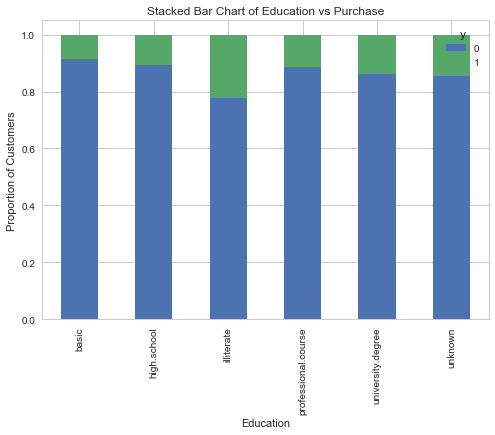

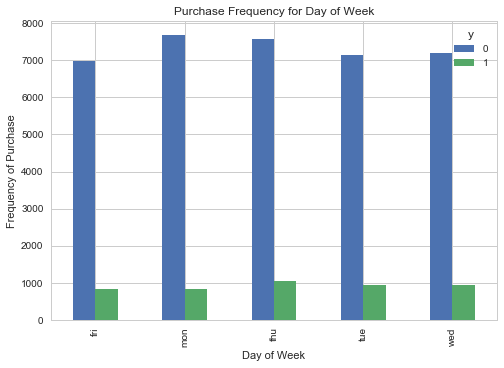

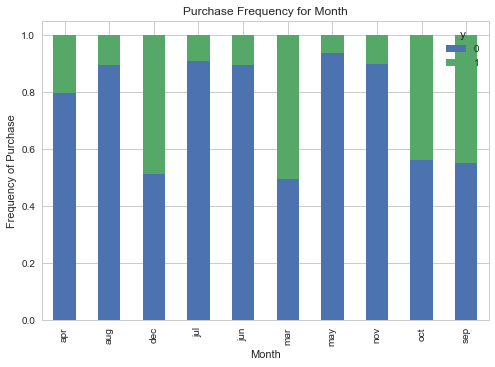

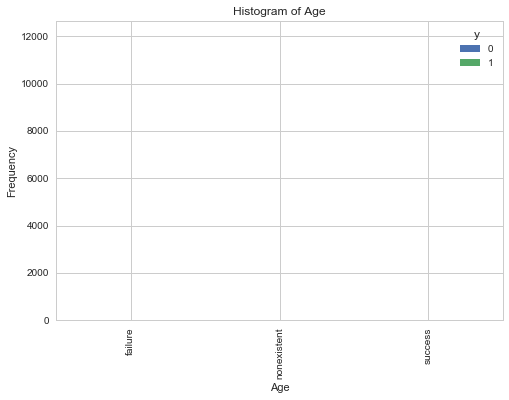

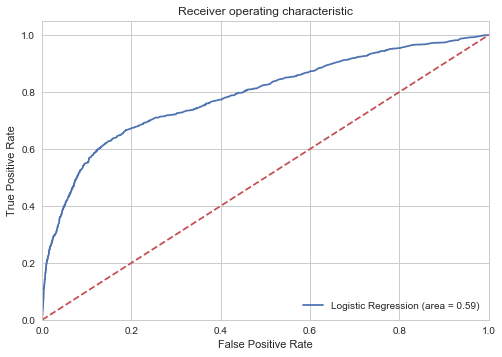

In [1]:
# =============================================================================
# Import
# =============================================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE   # recursive feature selection
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# =============================================================================
# Load Data
# =============================================================================
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))
data.head()


# Modify the 'education' column
data['education'].unique()

data['education'] = np.where(data['education']=='basic.4y', 'basic', data['education'])
data['education'] = np.where(data['education']=='basic.6y', 'basic', data['education'])
data['education'] = np.where(data['education']=='basic.9y', 'basic', data['education'])

data['education'].unique()

# =============================================================================
# Data Exploration
# =============================================================================
data['y'].value_counts()

sns.countplot(x='y', data=data, palette='hls')
plt.show()

data.groupby('y').mean()

data.groupby('job').mean()
data.groupby('marital').mean()
data.groupby('education').mean()

# =============================================================================
# Visualization
# =============================================================================
# job seems a strong predictor
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

# marital not a strong predictor
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

# education seems a strong predictor
table=pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

# day of week not a strong predictor
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

# month seems a strong predictor
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

# poutcome seems a strong predictor
table=pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')



# =============================================================================
# Create dummy variables
# =============================================================================
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]


# =============================================================================
# Feature Selection
# =============================================================================
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

cols = data_final.columns[rfe.support_]
X=data_final[cols]
y=data_final['y']


# =============================================================================
# Implementing the model
# =============================================================================
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())

# =============================================================================
# Logistic Regression Model Fitting
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


# =============================================================================
# Cross Validation
# =============================================================================
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


# =============================================================================
# Confusion Matrix
# =============================================================================
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# =============================================================================
# Compute precision, recall, F-measure and support
# =============================================================================
print(classification_report(y_test, y_pred))

# =============================================================================
# ROC Curve
# =============================================================================
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 8. Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

* __Softmax Score for Class k__

$s_k(x)=\theta_k^T\cdot x$

* __Softmax Function__

$\hat{p_k}=\sigma(s(x))_k=\frac{exp(s_k(x))}{\sum_{j=1}^{K}exp(s_{j}(x)}$

* __Cross Entropy Cost Function__

$J(\mathbb{\theta})=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}log(\hat{p_k}^{(i)})$

Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes

## 9. Softmax Regression in Python

In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict_proba([[5, 2]])
softmax_reg.predict([[5, 2]])

array([2])

## Reference
Data Prepare: https://machinelearningmastery.com/logistic-regression-for-machine-learning/

Softmax: https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/

Sample Code: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8